# Wheel Import Usage
<br>
This is an example of wheel import usage of the segmentation model. To use the model in this fashion, the wheel should be installed and accesible by the user. <br>
The model can be simply imported like any library <br>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import time
import pwrmonsh as pwr

# The segmentatione expects the DEF_MODEL_REGISTRY_DIR environment variable to be set
os.environ["DEF_MODEL_REGISTRY_DIR"]="${workspaceFolder}/data/powermonitor_shanghai/output"
INPUT_FILE = "${workspaceFolder}/data/powermonitor_shanghai/inputdata/2018_historical_data_NJHX_05_30000014_9_9_1.csv"

from pwrmonsh.segmentation import DefaultSegmentationService as Segmentation
import pwrmonsh.utility as ut
from pwrmonsh.dataprovider import json_csv_encoder
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'pwrmonsh'

<br>
The model object is instantiated in the following fashion.<br>

In [2]:

solver = Segmentation()

NameError: name 'Segmentation' is not defined

<br>
The training of the model requires a configuration which can be provided in "xml/json/dictonary." The configuration should necessarily have the "<i>input_file</i>" and "<i>model_dir</i>" parameter as these are used for accessing the data and storing the trained model.
<br>
The training method of the solver can be called in the following fashion. The training process is synchronous and returns a dictonary object which contains the model identifier in the parameter "<i>key</i>"
<br>

In [9]:
# alternative ways to run the pipeline / segmentation
# config = pwr.config.ConfigFactory.instance("/data/config/config.xml")
# config = pwr.config.ConfigFactory.instance(""/data/config/config.json")
config = pwr.config.ConfigFactory.instance(
{
    "input_file":INPUT_FILE,
    "model_dir":os.environ["DEF_MODEL_REGISTRY_DIR"]
})

model = solver.train(config)

2020-03-19T12:28:52+0100 INFO MainThread[140158395086656] ToeplitzSegmentation:Train
2020-03-19T12:28:52+0100 INFO MainThread[140158395086656] CASCSolver:done retrieving data
2020-03-19T12:28:53+0100 INFO MainThread[140158395086656] CASCSolver:lambda: 0.0001, beta: 50, clusters: 5, num stacked 1
2020-03-19T12:28:53+0100 INFO MainThread[140158395086656] CASCSolver:


 ITERATION ### 0
2020-03-19T12:28:55+0100 INFO MainThread[140158395086656] CASCSolver:


 ITERATION ### 1
2020-03-19T12:28:57+0100 INFO MainThread[140158395086656] CASCSolver:


 ITERATION ### 2
2020-03-19T12:28:59+0100 INFO MainThread[140158395086656] CASCSolver:


 ITERATION ### 3
2020-03-19T12:29:00+0100 INFO MainThread[140158395086656] CASCSolver:


 ITERATION ### 4
2020-03-19T12:29:02+0100 INFO MainThread[140158395086656] CASCSolver:CONVERGED!!!! BREAKING EARLY!!!
2020-03-19T12:29:02+0100 INFO MainThread[140158395086656] CASCSolver:BIC for beta 50 clusters 5 is 26434.34350432329
2020-03-19T12:29:02+0100 INFO MainThread

<br>
After training process the model can be accessed and the assigned segments can be queried by calling the "<i>segments</i>" method of the solver. <br>
The "<i>segments</i>" method requires model identifier as input argument to fetch corresponding segments. The return of the method is a dictonary object which contains segments as numpy array in "segments" element of the dictonary.
<br>

In [11]:
solver.segments(model["key"])

{'segments': [[1514764800, 1514883870, 2.0],
  [1514883900, 1514884140, 0.0],
  [1514884170, 1514933670, 1.0],
  [1514933700, 1514933940, 0.0],
  [1514933970, 1514962470, 3.0],
  [1514962500, 1514962740, 0.0],
  [1514962770, 1514977170, 1.0],
  [1514977200, 1514977440, 0.0],
  [1514977470, 1514985570, 3.0],
  [1514985600, 1514985840, 0.0],
  [1514985870, 1515109770, 4.0],
  [1515109800, 1515110040, 0.0],
  [1515110070, 1515167070, 3.0],
  [1515167100, 1515238740, 0.0],
  [1515238770, 1515272970, 3.0],
  [1515273000, 1515308940, 0.0],
  [1515308970, 1515391170, 3.0],
  [1515391200, 1515391440, 0.0],
  [1515391470, 1515409170, 4.0],
  [1515409200, 1515409440, 0.0],
  [1515409470, 1515426270, 3.0],
  [1515426300, 1515426540, 0.0],
  [1515426570, 1515452670, 1.0],
  [1515452700, 1515452940, 0.0],
  [1515452970, 1515495570, 3.0],
  [1515495600, 1515495840, 0.0],
  [1515495870, 1515554370, 1.0],
  [1515554400, 1515554640, 0.0],
  [1515554670, 1515577170, 4.0],
  [1515577200, 1515577440, 0.0]

<br>
A list of all the available segments (newly trained and all the previously trained) can be obtained by calling the member method "<i>models</i>" of the solver. <br>
The method requires the location where all the models are stored, this is usually the location provided in "<i>model_dir</i>" parameter during training. The method returns a dictonary with "<i>model_list</i>" member which contains a list of all the available models.

In [12]:

models = solver.models()
models

{'model_list': ['2018_historical_data_NJHX_05_30000014_9_9_1-2020-02-20-161127-2itGUidRp8gZ',
  'large_data_json_snap-2020-03-11-120651-lx5XnW5gUmIt',
  'large_data_json_snap-2020-03-18-121516-1V5xXnkCIiWC',
  'large_data_json_snap-2020-03-12-162027-kWR2d4ZnECzt',
  'large_data_json_snap-2020-03-12-162022-nEQcPL8fWp4_',
  'large_data_json_snap-2020-03-18-182415-n_4SfwT5-o_N',
  '2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-19-113315-CgOmr82W11cB',
  '2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-07-221345-AymC5Q2SwVW9',
  '2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-19-113316-MwipnJ3vCIYg',
  '2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-07-220328-TPfnzncycf-q',
  'large_data_json_snap-2020-03-12-090558-AUiN0czpaQEa',
  'large_data_json_snap-2020-03-12-162005-Tebhpa0wfQCy',
  '2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-07-211525-e9n9WGBBAggT',
  '2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-07-214508-uMzzVcIIb88F',
  'large_data_json_snap-202

2020-03-19T12:29:28+0100 INFO Thread-5[140156991006464] RefreshableModelRegistry:Refreshed Model Registry available models: 41, new models :1
2020-03-19T12:29:28+0100 INFO Thread-6[140156999661312] RefreshableModelRegistry:Refreshed Model Registry available models: 41, new models :1


Plotting the assignment results

In [13]:
def plot_data(matrix, data_df, temporal_col_name="date"):
    """
    Plots the signal with the assigned segments
    :param matrix: segments obtained by calling getSegments
    :param data_df: Signal data in Pandas DataFrame type
    :param temporal_col_name: Name of the column with temporal data
    """
    time = data_df.loc[:, data_df.columns == temporal_col_name]
    startIndices = matrix[:,0]
    endIndices = matrix[:,1]
    clusterID = matrix[:,2]
    data_df= data_df.loc[:, data_df.columns != temporal_col_name]
    dateconv = np.vectorize(dt.datetime.fromtimestamp)
    date = dateconv(time)
    startIndices = dateconv(startIndices)
    endIndices = dateconv(endIndices)
    colors = {}
    uq = len(np.unique(clusterID))
    color = iter(plt.cm.get_cmap('rainbow')(np.linspace(0, 1, uq)))
    for i in np.unique(clusterID):
        c = next(color)
        colors[i] = c

    size_param = 12
    label_pad = 75
    fig, ax = plt.subplots(len(data_df.columns.tolist()), 1, sharex='col',figsize=(size_param,size_param))
    handles = list()
    labels = list()
    clust = list()
    plts = []
    for num, column in enumerate(data_df.columns):
        ax[num].plot(date, np.array(data_df.loc[:, column]))
        try:
            end_part = str(column).split("_")[-2] + "_" + str(column).split("_")[-1]
        except:
            end_part = str(column).split("_")[-1]
        start_part = str(column)[:-1*len(end_part)]
        col_name = start_part + "\n" + end_part
        ax[num].set_ylabel(str(col_name), labelpad=label_pad, rotation=0)
        xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
        ax[num].xaxis.set_major_formatter(xfmt)
        i = 1
        for idx, start in enumerate(startIndices):
            end = endIndices[idx]
            color = colors[clusterID[idx]]
            if clusterID[idx] not in clust:
                i = 0
            else:
                i = 1
            ax[num].axvspan(start, end, facecolor=color, alpha=0.5, label="_" * i + str(clusterID[idx]))
            if clusterID[idx] not in clust:
                hand, _ = ax[num].get_legend_handles_labels()
                handles.append(hand[-1])
                labels.append(str(clusterID[idx]))
                clust.append(clusterID[idx])
    fig.legend(handles, labels, loc='center right')

    plt.xticks(rotation=25)
    plt.show()

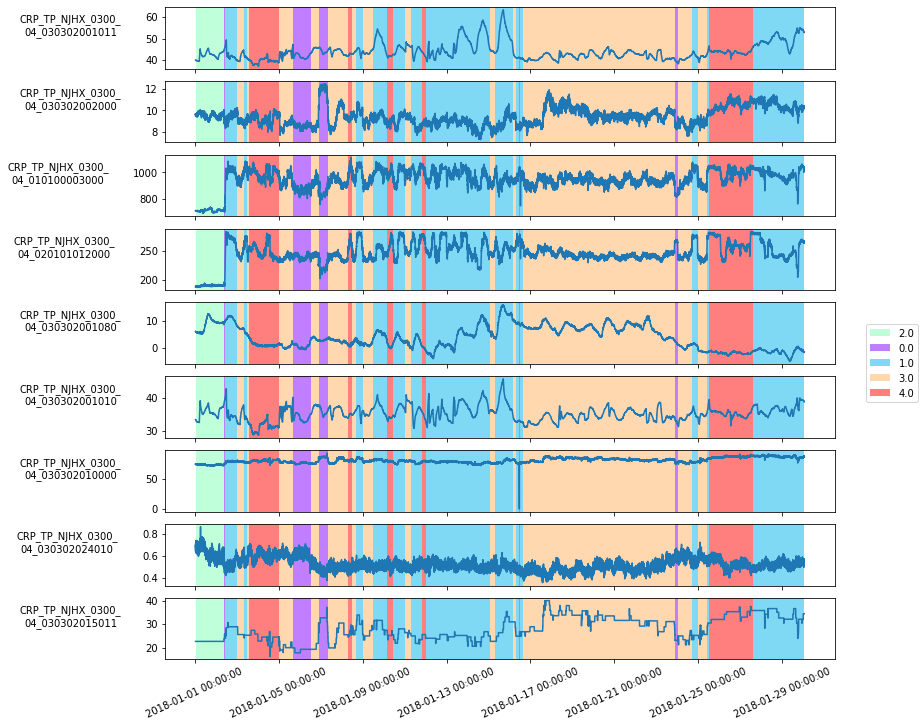

In [23]:
segments = solver.segments(model["key"])
df = json_csv_encoder().read_file(path=INPUT_FILE, out_type="pandas")
plot_data(np.array(segments["segments"]), df)

<br>
To tweak the segments and merge them together, the user can call the "<i>merge</i>" method of the solver. The method updates the model with identifier "<i>key</i>" and merge the segments with segmentID provided in "<i>segments</i>." The parameter "<i>segments</i>" should be a list of form [1,2,3]. The method returns the status of the merge request.
<br>

In [24]:
solver.merge(model["key"], segments=[1,2])

2020-03-19T12:32:18+0100 INFO MainThread[140158395086656] Config:{
    "input_file": null,
    "base_dir": null,
    "input_file_name": null,
    "resources": {
        "model_dir": "/home/filip/devel/python/shanghai/git/powermonitor_shanghai/output",
        "model_prefix": "/home/filip/devel/python/shanghai/git/powermonitor_shanghai/output/2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-19-122852-czqPTgVJhGyZ",
        "model_target_dir": "/home/filip/devel/python/shanghai/git/powermonitor_shanghai/output/2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-19-122852-czqPTgVJhGyZ",
        "feature_extracted_csv_path": "/home/filip/devel/python/shanghai/git/powermonitor_shanghai/output/2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-19-122852-czqPTgVJhGyZ/feature.csv",
        "model_param_path": "/home/filip/devel/python/shanghai/git/powermonitor_shanghai/output/2018_historical_data_NJHX_05_30000014_9_9_1-2020-03-19-122852-czqPTgVJhGyZ/parameters.pkl",
        "precision_mat_

{'success': True}

2020-03-19T12:32:28+0100 INFO Thread-14[140156991006464] RefreshableModelRegistry:Refreshed Model Registry available models: 41, new models :0
2020-03-19T12:32:28+0100 INFO Thread-15[140156999661312] RefreshableModelRegistry:Refreshed Model Registry available models: 41, new models :0


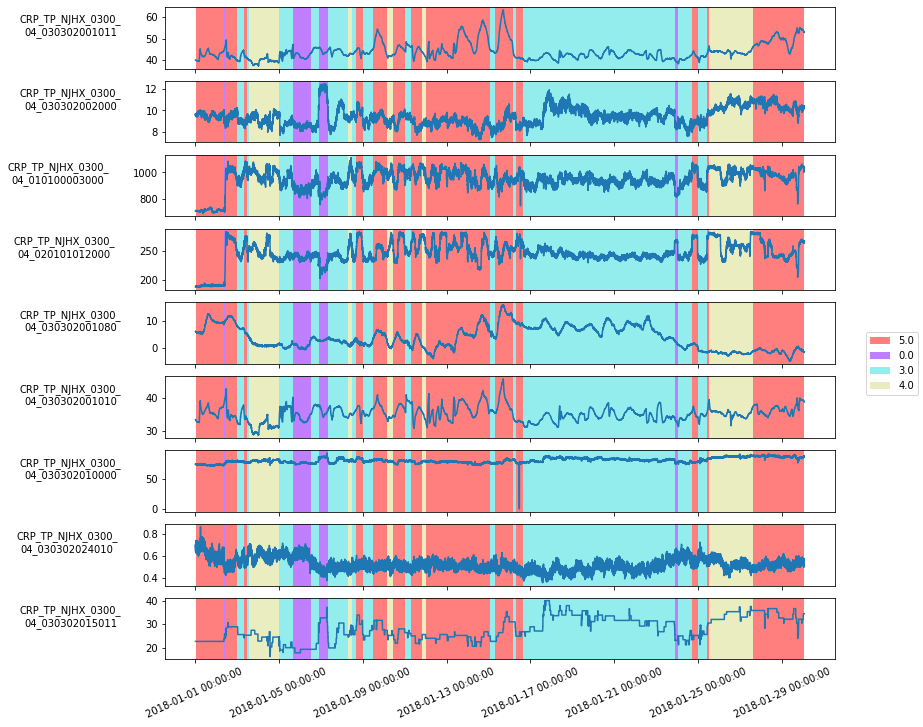

In [26]:
segments = solver.segments(model["key"])
df = json_csv_encoder().read_file(path=INPUT_FILE, out_type="pandas")
plot_data(np.array(segments["segments"]), df)